Name: Linear regression | Author: Alf Köhn | Version 01.10.2019 | License: CC BY-SA 4.0
***
# Linear regression 

When analyzing a dataset you might be looking for trends or scaling behaviour. Linear regression is often used to find simple relations in your dataset or, in other words, trying to approximate your dataset by a function. This notebook is about how to implement linear regression in Python. As expected, multiple ways exists to realize this: numpy, scipy, stats model and sckit learn. A simple example for the different methods is given and very briefly described.

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def create_dataset( xVals, m_set=.2, b_set=1., noise_level=.2 ):
    """
    function to create a dataset of the form y = (m*x+b) + random_number
    """
    
    yVals = m_set*xVals + b_set
    
    # add noise
    for ii in range( len(yVals) ):
        yVals[ii] += np.random.rand() * noise_level
        
    return yVals

# create the dataset
xVals  = np.linspace( -2, 10, 30 )
yVals  = create_dataset( xVals, m_set=.2, b_set=1., noise_level=.4 )

<IPython.core.display.Javascript object>


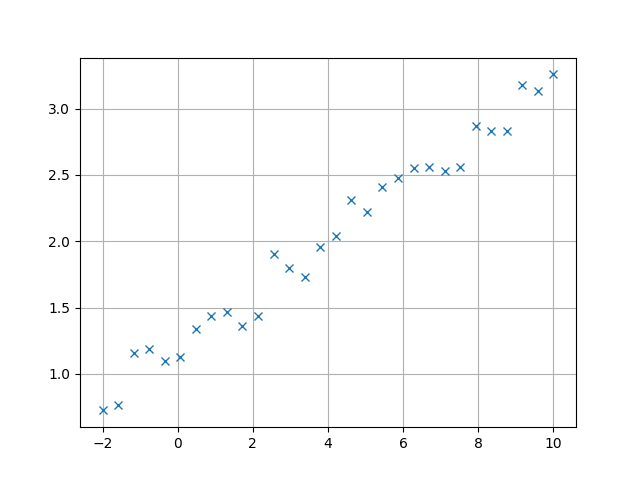

In [3]:
fig1 = plt.figure()
ax1  = fig1.add_subplot( 1,1,1 )

ax1.plot( xVals, yVals, marker='x', linestyle='None')
ax1.grid()

## 1. numpy.polyfit()

* least squares polynomial fit
* fits a polynomial $p(x) = p[0] * x**deg + ... + p[deg]$ of degree deg to points $(x, y)$ 
* returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, ... 0

* input: dataset, polynomial function of degree as specified by the user
* output: array of coefficient minimizing the squared error

* NOTE: not recommended by official documentations, instead the newer functions should be used https://docs.scipy.org/doc/numpy/reference/routines.polynomials.html

[ 0.20231498  1.19875724]


<IPython.core.display.Javascript object>


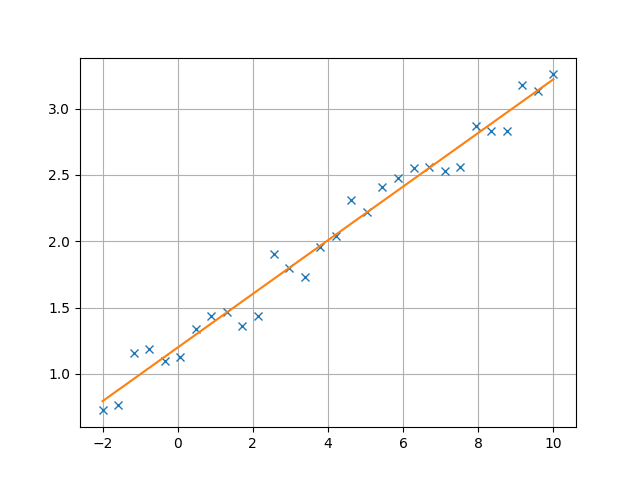

In [4]:
# fit a polynomial p(x)=p[0]*x**degree + ... + p[degree]
degree = 1
coeff  = np.polyfit( xVals, yVals, degree)
fit_1  = coeff[0]*xVals + coeff[1]

print( coeff )

fig2 = plt.figure()
ax2  = fig2.add_subplot( 1,1,1 )

ax2.plot( xVals, yVals, marker='x', linestyle='None')
ax2.plot( xVals, fit_1, marker='None', linestyle='solid' )
ax2.grid()

## 2. np.polynomial.polynomial.polyfit
* officially recommended instead of np.polyfit
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html#numpy.polynomial.polynomial.polyfit
* np.polynomial.polynomial.polyfit returns coefficients in opposite order of that for np.polyfit and np.polyval (or np.poly1d)
* np.polynomial.polynomial.polyfit returns coefficients [A, B, C] to A + Bx + Cx^2 + ..., while np.polyfit returns: ... + Ax^2 + Bx + C.

<IPython.core.display.Javascript object>


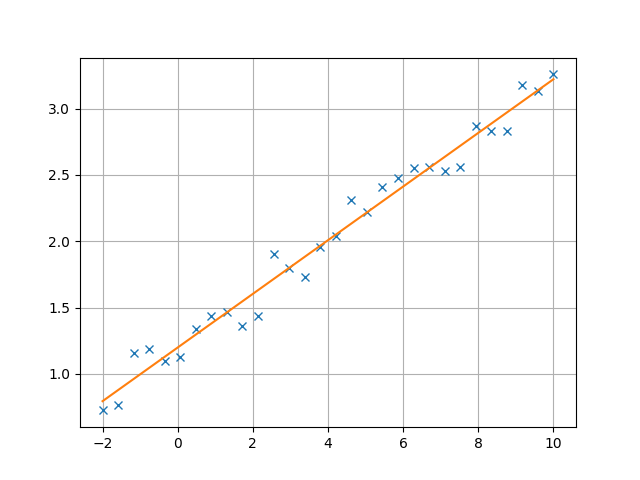

In [5]:
import numpy.polynomial.polynomial as poly

degree = 1
coefs  = poly.polyfit(xVals, yVals, degree)
fit_2  = poly.polyval(xVals, coefs)

# alternatively, one could also create the polynomial function:
#     fit_func = poly.Polynomial(coefs)
fig2 = plt.figure()
ax2  = fig2.add_subplot( 1,1,1 )

ax2.plot( xVals, yVals, marker='x', linestyle='None', label='data')
ax2.plot( xVals, fit_2, marker='None', linestyle='solid', label='fit' )
ax2.grid()

## 3. scipy.optimize.curve_fit

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

* like polyfit, but more general: fit a user-defined function to a dataset using non-linear least-square minimization

* for linear regression case, $m\cdot x+b$ is the estimator

* output: array of function parameters for which least-square measure and associated covariance matrix is minimized

optimized parameters: [ 0.20231498  1.19875724]


<IPython.core.display.Javascript object>


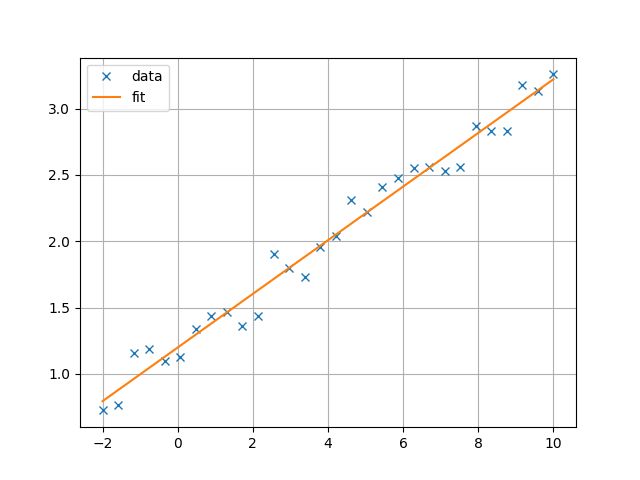

In [6]:
def func_fit2(xVals, a, b):
    return xVals*a + b

popt, pcov = curve_fit(func_fit2, xVals, yVals)
print( 'optimized parameters: {0}'.format(popt) )

# plot dataset and fit
fig4 = plt.figure()
ax4  = fig4.add_subplot( 1,1,1 )

ax4.plot( xVals, yVals, marker='x', linestyle='None', label='data')
ax4.plot( xVals, func_fit2(xVals, *popt), 
          marker='None', linestyle='solid',
          label='fit'
        )
ax4.legend()
ax4.grid()

## 4. numpy.linalg.lstsq

* calculates least-square solution to a linear system of equation by matrix factorization

* part of the useful linear algebra module of numpy

* solves $Ax = b$ by computing a vector $x$ that minimizes the $L^2$ norm (sometimes called Euclidean 2-norm) $||b - A x||^2$ 

* lstsq tries to solve $Ax=b$ minimizing $||b - Ax||^2$

* equation may be under-, well-, or over- determined (i.e., the number of linearly independent rows of a can be less than, equal to, or greater than its number of linearly independent columns)

slope = 0.20231498150269445, intercept = 1.1987572447804764


<IPython.core.display.Javascript object>


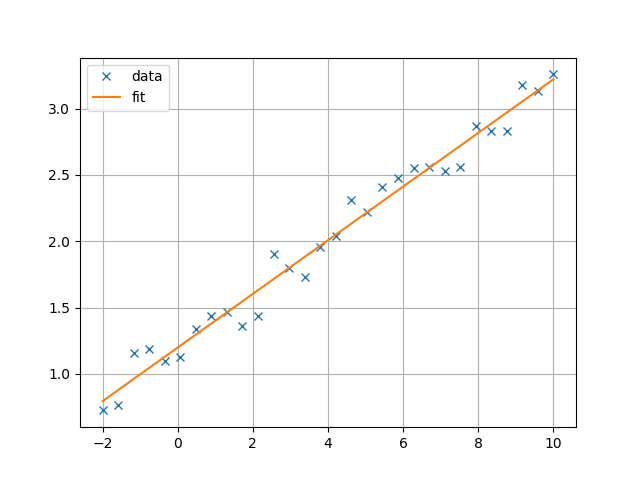

In [7]:
# first guess from looking at dataset: 
# gradient of roughly 1, intercept (cut the y-axis) at +1

# equation for linear function y=mx+b can rewritten as y=Ap,
# where A = [[x 1]] and p = [[m], [b]]
# now use lstsq to solve for p

# add column of 1 to allow for matrix multiplication (as just explained)
A = np.vstack( [xVals, np.ones(len(xVals))] ).T

# perform the fit
fit3_m, fit3_b = np.linalg.lstsq(A, yVals)[0]
print('slope = {0}, intercept = {1}'.format(fit3_m, fit3_b) )

# plot the data along with the fitted line
fig5 = plt.figure()
ax5  = fig5.add_subplot( 1,1,1 )

ax5.plot( xVals, yVals, marker='x', linestyle='None', label='data' )
ax5.plot( xVals, fit3_m*xVals+fit3_b, 
          marker='None', linestyle='solid',
          label='fit'
        )
ax5.legend()
ax5.grid()

## 5. scipy.stats.linregress

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

* calculate a linear least-squares regression for two sets of measurements

* specialized linear regression function from the `stats` module of `Scipy`

* somewhat restricted in its flexibility (optimized to calculate a linear least-squares regression for two sets of measurements only) 

* cannot fit a generalized linear model or multi-variate regression

* one of the fastest methods when it comes to simple linear regression

* return fitted coefficients, intercept term, and also basic statistics such as $R^2$ coefficient and standard error

slope: 0.20231498150269456  |  intercept: 1.1987572447804768
R-squared: 0.977431091905829


<IPython.core.display.Javascript object>


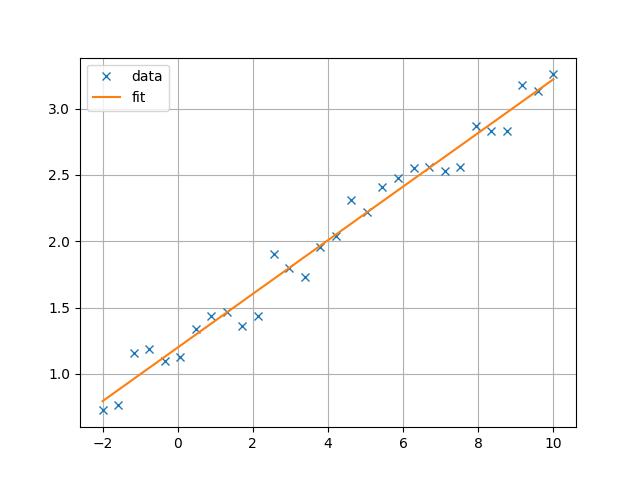

In [8]:
from scipy import stats

# perform the linear regression:
slope, intercept, r_value, p_value, std_err = stats.linregress(xVals, yVals)
print("slope: {0}  |  intercept: {1}".format(slope, intercept) )

# get coefficient of determination (R-squared)
print("R-squared: {0}".format(r_value**2) )

# plot the data along with the fitted line:
fig6 = plt.figure()
ax6  = fig6.add_subplot( 1,1,1 )

ax6.plot( xVals, yVals, marker='x', linestyle='None', label='data')
ax6.plot( xVals, intercept + slope*xVals, 
          marker='None', linestyle='solid',
          label='fit'
        )
ax6.grid()
ax6.legend()

## 6. Statsmodels.OLS

* http://www.statsmodels.org/dev/index.html

* `StatsModels` is built on top of `NumPy` and `SciPy`
* it is designed for a statistically-oriented approach to data analysis, with emphasis on econometric analyses
* has built-in support for many statistical tests to check quality of fit and dedicated set of plotting functions (for visualizing and diagnosing the fit)
* for linear regression the Ordinary Least-Squares (OLS) function provides extensive set of statistical information on estimation process
* note: constant needs to be added manually to x-data for calculating the intercept

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1213.
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.34e-24
Time:                        22:26:47   Log-Likelihood:                 23.621
No. Observations:                  30   AIC:                            -43.24
Df Residuals:                      28   BIC:                            -40.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1988      0.031     38.430      0.0

<IPython.core.display.Javascript object>


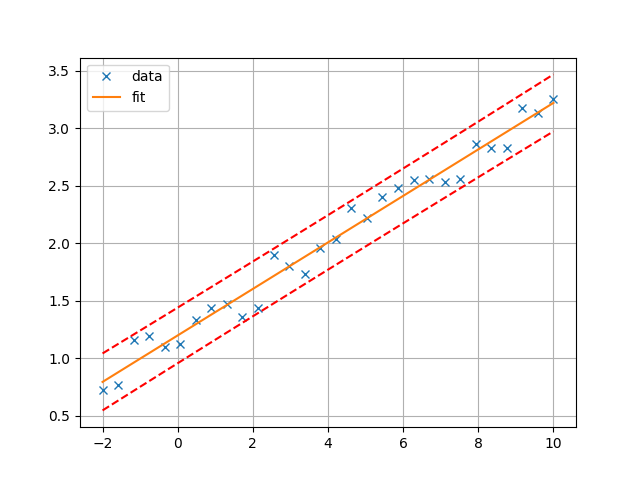

In [9]:
import statsmodels.api as sm

# model needs an intercept => add a column of 1
# here, the statsmodels tool add_constant is used for this

model = sm.OLS( yVals, sm.add_constant(xVals) )
results = model.fit()
print( results.summary() )

print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

# get the confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(results)

# plot the data along with the fitted line:
fig7 = plt.figure()
ax7  = fig7.add_subplot( 1,1,1 )

ax7.plot( xVals, yVals, marker='x', linestyle='None', label='data')
ax7.plot( xVals, results.fittedvalues, 
          marker='None', linestyle='solid',
          label='fit'
        )
ax7.plot( xVals, iv_u, linestyle='dashed', color='red')
ax7.plot( xVals, iv_l, linestyle='dashed', color='red')
ax7.grid()
ax7.legend()

## 7. sklearn.linear_model.LinearRegression()

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* scikit-learn is a powerful Python module for machine learning
* contains functions for regression, classification, clustering, model selection and dimensionality reduction
* `sklearn.linear_model` module contains methods intended for regression in which the target value is expected to be a linear combination of the input variables
* Ordinary least squares Linear Regression
* Note: from implementation point of view, this is plain Ordinary Least Squares (scipy.linalg.lstsq) wrapped as a predictor object

  
  
* `sklearn` has a few maybe more interesting datasets included: example is the https://archive.ics.uci.edu/ml/datasets/Housing Boston Housing dataset which contains information about the housing values in suburbs of Boston
* accessed as follows:

    `from sklearn.datasets import load_boston`
    
    `boston = load_boston()`
    
    `print( boston.keys() )`

optimized coefficients: [ 0.20231498  0.        ]
optimized intercept: 1.1987572447804768
[ 1.80570219]


<IPython.core.display.Javascript object>


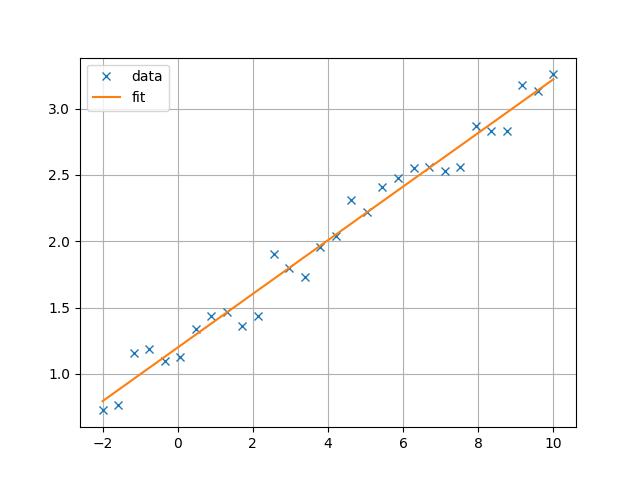

In [10]:
from sklearn.linear_model import LinearRegression

X = np.vstack( [xVals, np.ones(len(xVals))] ).T

# perform the fit
reg = LinearRegression().fit( X , yVals)
reg.score(X, yVals)

print( 'optimized coefficients: {0}'.format(reg.coef_) )
print( 'optimized intercept: {0}'.format(reg.intercept_) )

# make a prediction using the test data set
print( reg.predict(np.array([[3, 5]])) )

# plot the data along with the fitted line:
fig8 = plt.figure()
ax8  = fig8.add_subplot( 1,1,1 )

ax8.plot( xVals, yVals, marker='x', linestyle='None', label='data')
ax8.plot( xVals, reg.coef_[0]*xVals + reg.intercept_, 
          marker='None', linestyle='solid',
          label='fit'
        )
ax8.grid()
ax8.legend()